####  Exploring various repositories and datasets

In [1]:
import pandas as pd
data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
column_names = ['pregnancy_x', 
                'plasma_con', 
                'blood_pressure', 
                'skin_mm', 
                'insulin', 
                'bmi', 
                'pedigree_func', 
                'age', 
                'target']

In [2]:
feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address , names=column_names)

In [3]:
all_data.head()

,pregnancy_x,plasma_con,blood_pressure,skin_mm,insulin,bmi,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
all_data.describe()

,pregnancy_x,plasma_con,blood_pressure,skin_mm,insulin,bmi,pedigree_func,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


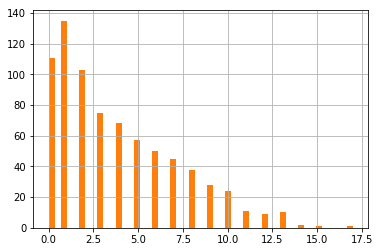

In [6]:
all_data.pregnancy_x.hist(bins=50)
import matplotlib.pyplot as plt
plt.show()

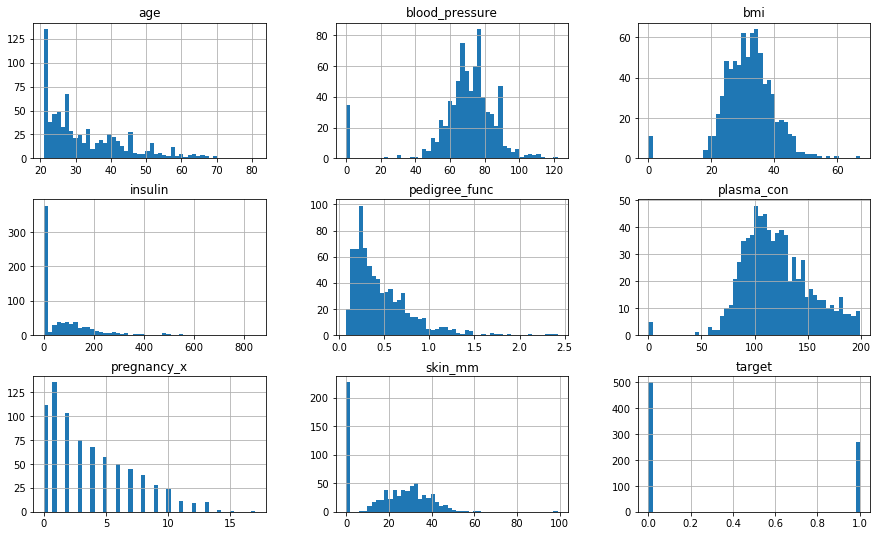

In [9]:
all_data.hist(figsize=(15,9),bins=50)
plt.show()

In [10]:
all_data.target.value_counts()

0    500
1    268
Name: target, dtype: int64

#### Logistic regression and confusion matrix

In [11]:
import numpy as np
X = all_data[feature_names]
y = all_data['target']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=7,stratify=y)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.74675324675324672

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred,labels = [1,0])

array([[27, 27],
       [12, 88]])

#### Varying the classification threshold in logistic regression 

In [17]:
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba

array([[ 0.87111104,  0.12888896],
       [ 0.84000803,  0.15999197],
       [ 0.8182751 ,  0.1817249 ],
       [ 0.73979367,  0.26020633],
       [ 0.80394249,  0.19605751],
       [ 0.97662351,  0.02337649],
       [ 0.91420349,  0.08579651],
       [ 0.69100124,  0.30899876],
       [ 0.84742543,  0.15257457],
       [ 0.42467404,  0.57532596],
       [ 0.80530357,  0.19469643],
       [ 0.45489007,  0.54510993],
       [ 0.76048394,  0.23951606],
       [ 0.78348704,  0.21651296],
       [ 0.26617347,  0.73382653],
       [ 0.92887059,  0.07112941],
       [ 0.48232289,  0.51767711],
       [ 0.76436334,  0.23563666],
       [ 0.72848225,  0.27151775],
       [ 0.9718447 ,  0.0281553 ],
       [ 0.38360476,  0.61639524],
       [ 0.37864396,  0.62135604],
       [ 0.69900059,  0.30099941],
       [ 0.63860979,  0.36139021],
       [ 0.26274478,  0.73725522],
       [ 0.68877782,  0.31122218],
       [ 0.69870553,  0.30129447],
       [ 0.90454488,  0.09545512],
       [ 0.82254   ,

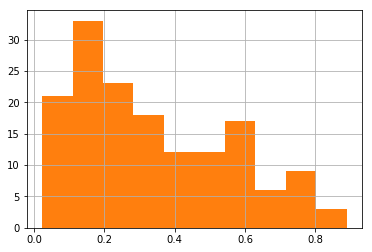

In [19]:
pd.Series(y_pred_proba[:,1]).hist()
plt.show()

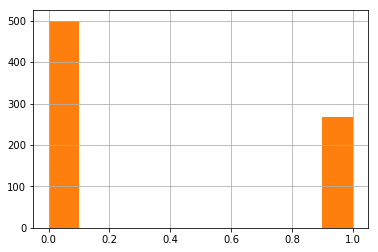

In [21]:
all_data['target'].hist()
plt.show()

In [23]:
from sklearn.preprocessing import binarize
y_pred_proba

array([[ 0.87111104,  0.12888896],
       [ 0.84000803,  0.15999197],
       [ 0.8182751 ,  0.1817249 ],
       [ 0.73979367,  0.26020633],
       [ 0.80394249,  0.19605751],
       [ 0.97662351,  0.02337649],
       [ 0.91420349,  0.08579651],
       [ 0.69100124,  0.30899876],
       [ 0.84742543,  0.15257457],
       [ 0.42467404,  0.57532596],
       [ 0.80530357,  0.19469643],
       [ 0.45489007,  0.54510993],
       [ 0.76048394,  0.23951606],
       [ 0.78348704,  0.21651296],
       [ 0.26617347,  0.73382653],
       [ 0.92887059,  0.07112941],
       [ 0.48232289,  0.51767711],
       [ 0.76436334,  0.23563666],
       [ 0.72848225,  0.27151775],
       [ 0.9718447 ,  0.0281553 ],
       [ 0.38360476,  0.61639524],
       [ 0.37864396,  0.62135604],
       [ 0.69900059,  0.30099941],
       [ 0.63860979,  0.36139021],
       [ 0.26274478,  0.73725522],
       [ 0.68877782,  0.31122218],
       [ 0.69870553,  0.30129447],
       [ 0.90454488,  0.09545512],
       [ 0.82254   ,

In [24]:
y_pred_default = binarize(y_pred_proba, threshold=0.5)
y_pred_default

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,

In [25]:
y_pred_default[:,1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [26]:
confusion_matrix(y_test, y_pred_default[:,1],labels = [1,0])

array([[27, 27],
       [12, 88]])

In [27]:
y_pred_low = binarize(y_pred_proba, threshold=0.2)
confusion_matrix(y_test, y_pred_low[:,1],labels=[1,0])

array([[50,  4],
       [48, 52]])

In [28]:
from __future__ import division
def npv_func(th):
    y_pred_low = binarize(y_pred_proba, threshold=th)
    second_column = confusion_matrix(y_test, y_pred_low[:,1],labels=[1,0])[:,1]
    npv = second_column[1]/second_column.sum()
    return npv

npv_func(0.2)

0.9285714285714286

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


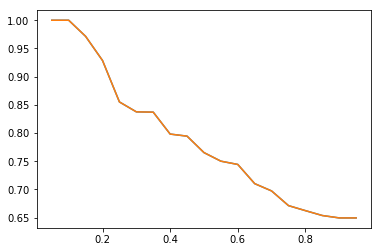

In [30]:
ths = np.arange(0,1,0.05)

npvs = []
for th in np.arange(0,1.00,0.05):
    npvs.append(npv_func(th))
    
plt.plot(ths,npvs)
plt.show()

#### Analysis and Plotting an ROC curve without context 

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

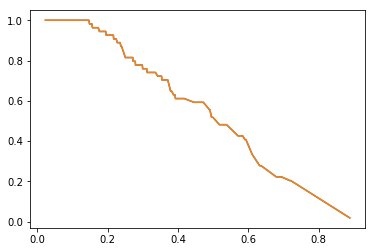

In [33]:
plt.plot(ths,tpr)
plt.show()

In [34]:
y_pred_th= binarize(y_pred_proba, threshold=0.1)
confusion_matrix(y_test, y_pred_th[:,1],labels=[1,0])

array([[54,  0],
       [81, 19]])

In [35]:
y_pred_th = binarize(y_pred_proba, threshold=0.146)
confusion_matrix(y_test, y_pred_th[:,1],labels=[1,0])

array([[54,  0],
       [67, 33]])

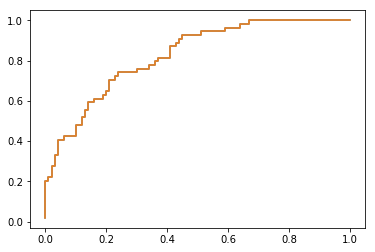

In [37]:
fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.show()

In [38]:
from sklearn.metrics import auc
auc(fpr,tpr)

0.82518518518518524

#### UCI breast cancer dataset 

In [51]:
import numpy as np
import pandas as pd
data_web_address = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ['radius',
                'texture',
                'perimeter',
                'area',
                'smoothness' 
                ,'compactness',
                'concavity',
                'concave points', 
                'symmetry',
                'malignant']
feature_names = column_names[:-1]
all_data = pd.read_csv(data_web_address , names=column_names)
all_data.dtypes

radius             int64
texture            int64
perimeter          int64
area               int64
smoothness         int64
compactness       object
concavity          int64
concave points     int64
symmetry           int64
malignant          int64
dtype: object

In [52]:
#changing the state of having cancer to 1, not having cancer to 0
all_data['malignant'] = all_data['malignant'].astype(np.int)
all_data['malignant'] = np.where(all_data['malignant'] == 4, 1,0) #4, and now 1 means malignant
all_data['malignant'].value_counts()

0    458
1    241
Name: malignant, dtype: int64

In [54]:
X = all_data[[col for col in feature_names if col != 'compactness']]
y = all_data.malignant

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_proba = lr.predict_proba(X_test)

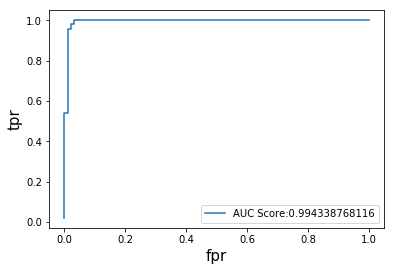

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

fpr, tpr, ths = roc_curve(y_test, y_pred_proba[:,1])

auc_score = auc(fpr,tpr)
plt.plot(fpr,tpr,label="AUC Score:" + str(auc_score))
plt.xlabel('fpr',fontsize='15')
plt.ylabel('tpr',fontsize='15')
plt.legend(loc='best')